In [32]:
# from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
# !pip install -q keras
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns




# Specify the name of the output text file
output_file_name = "CNN_SHAP.txt"
with open(output_file_name, "w") as f: print('---------------------------------------------------------------------------------', file = f)

###################################################
###################################################
###################################################
# drive.mount('/content/drive')

In [33]:
import pandas as pd

req_cols = [' Destination Port',' Flow Duration',' Total Fwd Packets',' Total Backward Packets','Total Length of Fwd Packets',' Total Length of Bwd Packets',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Fwd Packet Length Std','Bwd Packet Length Max',' Bwd Packet Length Min',' Bwd Packet Length Mean',' Bwd Packet Length Std','Flow Bytes/s',' Flow Packets/s',' Flow IAT Mean',' Flow IAT Std',' Flow IAT Max',' Flow IAT Min','Fwd IAT Total',' Fwd IAT Mean',' Fwd IAT Std',' Fwd IAT Max',' Fwd IAT Min','Bwd IAT Total',' Bwd IAT Mean',' Bwd IAT Std',' Bwd IAT Max',' Bwd IAT Min','Fwd PSH Flags',' Bwd PSH Flags',' Fwd URG Flags',' Bwd URG Flags',' Fwd Header Length',' Bwd Header Length','Fwd Packets/s',' Bwd Packets/s',' Min Packet Length',' Max Packet Length',' Packet Length Mean',' Packet Length Std',' Packet Length Variance','FIN Flag Count',' SYN Flag Count',' RST Flag Count',' PSH Flag Count',' ACK Flag Count',' URG Flag Count',' CWE Flag Count',' ECE Flag Count',' Down/Up Ratio',' Average Packet Size',' Avg Fwd Segment Size',' Avg Bwd Segment Size',' Fwd Header Length','Fwd Avg Bytes/Bulk',' Fwd Avg Packets/Bulk',' Fwd Avg Bulk Rate',' Bwd Avg Bytes/Bulk',' Bwd Avg Packets/Bulk','Bwd Avg Bulk Rate','Subflow Fwd Packets',' Subflow Fwd Bytes',' Subflow Bwd Packets',' Subflow Bwd Bytes','Init_Win_bytes_forward',' Init_Win_bytes_backward',' act_data_pkt_fwd',' min_seg_size_forward','Active Mean',' Active Std',' Active Max',' Active Min','Idle Mean',' Idle Std',' Idle Max',' Idle Min',' Label']

fraction = 1

print('---------------------------------------------------------------------------------')
print('Loading Databases')
print('---------------------------------------------------------------------------------')
print('')
str = '/home/oarreche@ads.iu.edu/HITL/cicids/'

df0 = pd.read_csv (str +'cicids_db/Wednesday-workingHours.pcap_ISCX.csv', usecols=req_cols).sample(frac = fraction)
df1 = pd.read_csv (str +'cicids_db/Tuesday-WorkingHours.pcap_ISCX.csv', usecols=req_cols).sample(frac = fraction)
df2 = pd.read_csv (str +'cicids_db/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', usecols=req_cols).sample(frac = fraction)
df3 = pd.read_csv (str +'cicids_db/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv', usecols=req_cols).sample(frac = fraction)
df4 = pd.read_csv (str +'cicids_db/Monday-WorkingHours.pcap_ISCX.csv', usecols=req_cols).sample(frac = fraction)
df5 = pd.read_csv (str +'cicids_db/Friday-WorkingHours-Morning.pcap_ISCX.csv', usecols=req_cols).sample(frac = fraction)
df6 = pd.read_csv (str +'cicids_db/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', usecols=req_cols).sample(frac = fraction)
df7 = pd.read_csv (str +'cicids_db/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv', usecols=req_cols).sample(frac = fraction)

frames = [df0, df1, df2, df3, df4, df5,df6, df7]

df = pd.concat(frames,ignore_index=True)


# df.pop(' PSH Flag Count')
# df.pop(' ACK Flag Count')
# df.pop(' Destination Port')
# df.pop('Init_Win_bytes_forward')
# df.pop(' Packet Length Std')
# df.pop(' Average Packet Size')
# df.pop(' Fwd IAT Max')
# df.pop('Fwd IAT Total')
# df.pop('Bwd IAT Total')
# df.pop(' Packet Length Mean')
# df.pop(' Flow Duration')
# df.pop(' Flow IAT Max')
# df.pop(' Bwd IAT Max')
# df.pop(' Max Packet Length')
# df.pop('Fwd Packets/s')
# df.pop(' min_seg_size_forward')
# df.pop('FIN Flag Count')
# df.pop('Idle Mean')
# df.pop(' Fwd IAT Std')
# df.pop(' Fwd Packet Length Mean')
# df.pop('Fwd PSH Flags')
# df.pop(' Flow IAT Std')
df.pop(' Down/Up Ratio')
df.pop(' Fwd IAT Mean')
df.pop(' Init_Win_bytes_backward')
df.pop(' URG Flag Count')
df.pop(' Bwd IAT Mean')
df.pop(' SYN Flag Count')
df.pop(' Idle Max')
df.pop(' Idle Min')
df.pop(' Idle Std')
df.pop('Total Length of Fwd Packets')
df.pop(' Subflow Fwd Bytes')

features_to_remove = [
    ' Packet Length Variance',
    # ' Active Min',
    # ' Flow IAT Mean',
    ' Fwd Packet Length Std',
    ' Fwd Packet Length Max',
    ' Bwd Packet Length Mean',
    # ' Bwd Packet Length Std',
    # ' Active Max',
    ' Active Std',
    # ' Bwd Packet Length Min',
    ' Bwd IAT Std',
    ' Fwd IAT Min',
    ' Fwd Packet Length Min',
    # ' Bwd Packets/s',
    'Bwd Packet Length Max',
    ' Min Packet Length',
    'Active Mean',
    # ' Avg Bwd Segment Size',
    # ' Avg Fwd Segment Size',
    ' Total Backward Packets',
    # ' Bwd IAT Min',
    'Subflow Fwd Packets',
    ' Flow IAT Min',
    ' Fwd Header Length',
    ' act_data_pkt_fwd',
    ' Subflow Bwd Packets',
    ' Bwd Header Length',
    ' Total Fwd Packets',
    ' Total Length of Bwd Packets',
    ' Subflow Bwd Bytes',
    'Fwd Avg Bytes/Bulk',
    ' Fwd URG Flags',
    ' Flow Packets/s',
    'Flow Bytes/s',
    ' CWE Flag Count',
    ' Bwd PSH Flags',
    ' Bwd URG Flags',
    ' ECE Flag Count',
    ' Fwd Avg Packets/Bulk',
    'Bwd Avg Bulk Rate',
    ' Bwd Avg Packets/Bulk',
    ' Bwd Avg Bytes/Bulk',
    ' Fwd Avg Bulk Rate',
    ' RST Flag Count'
]

for feature in features_to_remove:
    try:
        df.pop(feature)
    except KeyError:
        print(f"Feature '{feature}' not found in the dataframe.")

# Now, df has the desired features removed

# df = df.sample(frac = 1)
# df = pd.concat(frames,ignore_index=True)
# df = df.sample(frac = fraction )
y = df.pop(' Label')
# y , v = pd.factorize(y)
df = df.assign(Label = y)


# Specify the name of the output text file
# output_file_name = "Wilcoxon_CIC.txt"
# with open(output_file_name, "w") as f: print('---------------------------------------------------------------------------------', file = f)
###################################################
###################################################
###################################################
###################################################


---------------------------------------------------------------------------------
Loading Databases
---------------------------------------------------------------------------------



In [34]:
from collections import Counter
from sklearn.model_selection import train_test_split
import sklearn
print('---------------------------------------------------------------------------------')
print('Reducing Normal rows')
print('---------------------------------------------------------------------------------')
print('')

frac_normal = 0.2
split = 0.8

#filters
filtered_normal = df[df['Label'] == 'BENIGN']

#reduce
reduced_normal = filtered_normal.sample(frac=frac_normal)

#join
df = pd.concat([df[df['Label'] != 'BENIGN'], reduced_normal])

''' ---------------------------------------------------------------'''
df_max_scaled = df.copy()


y = df_max_scaled['Label'].replace({'DoS GoldenEye': 'Dos/Ddos', 'DoS Hulk': 'Dos/Ddos', 'DoS Slowhttptest': 'Dos/Ddos', 'DoS slowloris': 'Dos/Ddos', 'Heartbleed': 'Dos/Ddos', 'DDoS': 'Dos/Ddos','FTP-Patator': 'Brute Force', 'SSH-Patator': 'Brute Force','Web Attack - Brute Force': 'Web Attack', 'Web Attack - Sql Injection': 'Web Attack', 'Web Attack - XSS': 'Web Attack'})

df_max_scaled.pop('Label')


print('---------------------------------------------------------------------------------')
print('Normalizing database')
print('---------------------------------------------------------------------------------')
print('')

df_max_scaled
for col in df_max_scaled.columns:
    t = abs(df_max_scaled[col].max())
    df_max_scaled[col] = df_max_scaled[col]/t
df_max_scaled
df = df_max_scaled.assign( Label = y)
#df
df = df.fillna(0)

y = df.pop('Label')
X = df
y , v = pd.factorize(y)
df = df.assign(Label = y)

counter = Counter(y)
print(counter)


---------------------------------------------------------------------------------
Reducing Normal rows
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
Normalizing database
---------------------------------------------------------------------------------

Counter({6: 454619, 0: 380699, 5: 158930, 1: 13835, 2: 2180, 4: 1966, 3: 36})


In [35]:
X_train,X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=split,random_state=42)
df = X.assign( ALERT = y)
x_train,Y_train=X_train, y_train
x_test,Y_test=X_test, y_test

In [36]:
import numpy as np
print(np.shape(x_train))
print(np.shape(Y_train))
print(np.shape(x_test))
print(np.shape(Y_test))


(809812, 31)
(809812,)
(202453, 31)
(202453,)


In [37]:
x_train = x_train.values
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape
# x_train

In [38]:
x_test = x_test.values
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(202453, 31, 1)

In [39]:
x_train2 = []
for i in range(0,len(x_train)):
    if i%10 == 0:
        x_train2.append(x_train[i])
        if len(x_train2) >= 1: break # change this line to select more samples

In [40]:
x_test2 = []
for i in range(0,len(x_test)):
    if i%10 == 0:
        x_test2.append(x_test[i])
        if len(x_test2) >= 1: break # change this line to select more samples

In [41]:
x_train2 = np.array(x_train2)
x_test2 = np.array(x_test2)

# Model

In [42]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, SimpleRNN , GRU , Activation
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras import optimizers
import tensorflow as tf
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D , AveragePooling1D

In [43]:
model = Sequential()

model.add(Convolution1D(32, 3, padding="same",activation="relu",input_shape = (x_train.shape[1], 1)))
# model.add(Convolution1D(32, 3, activation="relu"))
model.add(MaxPooling1D(pool_size=(4)))
# model.add(tf.keras.layers.LayerNormalization())
# model.add(GRU(units = 128, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.5))

model.add(Convolution1D(64, 3, padding="same",activation="relu"))
# model.add(Convolution1D(64, 3,activation="relu"))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.5))
# model.add(tf.keras.layers.LayerNormalization())

# model.add(Convolution1D(64, 3, padding="same",activation="relu"))
# model.add(Convolution1D(64, 3,activation="relu"))
# model.add(AveragePooling1D(pool_size=(2)))
# model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(7, activation="softmax"))
# model.add(Dense(2, activation="softmax"))

In [44]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
Y_train

array([6, 0, 5, ..., 0, 6, 0])

In [45]:
from keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model with EarlyStopping callback
model.fit(x_train, Y_train, epochs=100, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Save the trained model
# model.save("CNN_CIC_1.h5")
# model = load_model("CNN_CIC_1.h5")


Epoch 1/100
5062/5062 [==============================] - 42s 8ms/step - loss: 0.6244 - accuracy: 0.8578 - val_loss: 0.2006 - val_accuracy: 0.9260
Epoch 2/100
5062/5062 [==============================] - 41s 8ms/step - loss: 0.2423 - accuracy: 0.9107 - val_loss: 0.1550 - val_accuracy: 0.9494
Epoch 3/100
5062/5062 [==============================] - 41s 8ms/step - loss: 0.5165 - accuracy: 0.9231 - val_loss: 0.1366 - val_accuracy: 0.9554
Epoch 4/100
5062/5062 [==============================] - 41s 8ms/step - loss: 0.1928 - accuracy: 0.9301 - val_loss: 0.1233 - val_accuracy: 0.9591
Epoch 5/100
5062/5062 [==============================] - 41s 8ms/step - loss: 2.7249 - accuracy: 0.9358 - val_loss: 0.1149 - val_accuracy: 0.9570
Epoch 6/100
5062/5062 [==============================] - 41s 8ms/step - loss: 0.1674 - accuracy: 0.9398 - val_loss: 0.1013 - val_accuracy: 0.9669
Epoch 7/100
5062/5062 [==============================] - 41s 8ms/step - loss: 0.1596 - accuracy: 0.9428 - val_loss: 0.1005 -

In [46]:
import joblib
from keras.models import load_model
# Save the data

# joblib.dump(x_train2, 'x_train_cic.pkl')
# x_train = joblib.load('x_train_cic.pkl')
# model = load_model("CNN_CIC_1.h5")

# joblib.dump(x_train2, 'x_train2_cic.pkl')
# x_train2 = joblib.load('x_train2_cic.pkl')

In [47]:
tf.keras.utils.plot_model(model, 'my_first_model.png', show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [48]:
pred = model.predict(x_test)
y_pred= np.argmax(pred, axis = 1)

Evaluation of the model

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import (precision_score, recall_score,
                             f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
confusion_matrix(Y_test, y_pred)

array([[75069,   112,     0,     0,     0,     0,  1061],
       [   16,  2752,     0,     0,     0,     0,    15],
       [    3,    40,     0,     0,     0,     0,   387],
       [    0,     0,     0,     0,     0,     0,     7],
       [    0,     0,     0,     0,   259,    11,   142],
       [   30,     8,     0,     0,     0, 31287,   242],
       [ 1310,   118,     0,     0,    63,  2229, 87292]])

In [50]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score

accuracy =accuracy_score(Y_test, y_pred)*100
print(accuracy)
recall = recall_score(Y_test, y_pred , average="macro")
# recall = recall_score(y_21_test, y_pred , average="binary")
precision = precision_score(Y_test, y_pred , average="macro")
f1 = f1_score(Y_test, y_pred, average="macro")
print("recall")
print("%.4f" %recall)
print("precision")
print("%.4f" %precision)
print("f1score")
print(f1)
print('MMC',matthews_corrcoef(Y_test, y_pred))
print('BACC',balanced_accuracy_score(Y_test, y_pred))
print('ROCAUC',roc_auc_score(Y_test, model.predict(x_test), multi_class='ovr'))

97.13810118891793
recall
0.6503
precision
0.6582
f1score
0.6523325440434233


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


MMC 0.9549948443366449
BACC 0.6503389634223209
ROCAUC 0.997793838977515


In [51]:
#Shap

import shap

explainer = shap.DeepExplainer(model = model, data = x_train) #fast


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.


In [52]:
x_test2

array([[[2.48725852e-03],
        [3.50000006e-07],
        [0.00000000e+00],
        [2.07182320e-03],
        [0.00000000e+00],
        [3.50000000e-07],
        [0.00000000e+00],
        [3.50000000e-07],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [7.93650794e-03],
        [1.19047619e-02],
        [2.41740532e-04],
        [7.70547945e-04],
        [7.32132563e-04],
        [0.00000000e+00],
        [1.00000000e+00],
        [0.00000000e+00],
        [1.02739726e-03],
        [0.00000000e+00],
        [1.03439359e-03],
        [4.45563439e-01],
        [4.30107527e-01],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]]])

In [53]:

# shap_values = explainer.shap_values(x_test2) #takes time
import time
print('---------------------------------------------------------------------------------')
print('Training the SHAP')
print('---------------------------------------------------------------------------------')
print('')

start = time.time()
shap_values = explainer.shap_values(x_test2)
end = time.time()
print('---------------------------------------------------------------------------------')
print('ELAPSE TIME SHAP: ',(end - start)/60, 'min')
print('---------------------------------------------------------------------------------')
print('')

---------------------------------------------------------------------------------
Training the SHAP
---------------------------------------------------------------------------------



`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


---------------------------------------------------------------------------------
ELAPSE TIME SHAP:  3.210591479142507 min
---------------------------------------------------------------------------------



In [54]:
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
# x_test.shape

# Assuming x_test is the reshaped array
x_test3 = np.squeeze(x_test2, axis=-1)

# Display the shape of the original array
print(x_test3.shape)

# Assuming x_test is the reshaped array
shap_values2 = np.squeeze(shap_values, axis=-1)

# Display the shape of the original array
print(shap_values2.shape)


(1, 31)
(7, 1, 31)


In [55]:
# Convert to pandas
x_test3_df = pd.DataFrame(x_test3)
# x_test3_df.shape
# x_test3_df[:]

In [56]:
#Reverse arrays 
v1 = shap_values2.shape
v2 = x_test3_df[:].shape
print(v1,v2)

(7, 1, 31) (1, 31)


In [57]:
# Reshape shap_values2 to have the shape (n_samples, n_features)
shap_values_reshaped = shap_values2.reshape(v1[1], -1)
print(shap_values_reshaped.shape)
print(v2)
print(shap_values_reshaped.shape)

(1, 217)
(1, 31)
(1, 217)


In [58]:
v1 = shap_values2.shape
v2 = x_test3_df[:].shape
print(v1,v2)
print(type(shap_values2),type(x_test3_df[:]))
shap_values3 = list(shap_values2)
u1 = list(v)

(7, 1, 31) (1, 31)
<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>


In [59]:
column_names = X.columns.tolist()
column_names
df = x_test3_df
df.rename(columns=dict(zip(df.columns, column_names)), inplace=True)

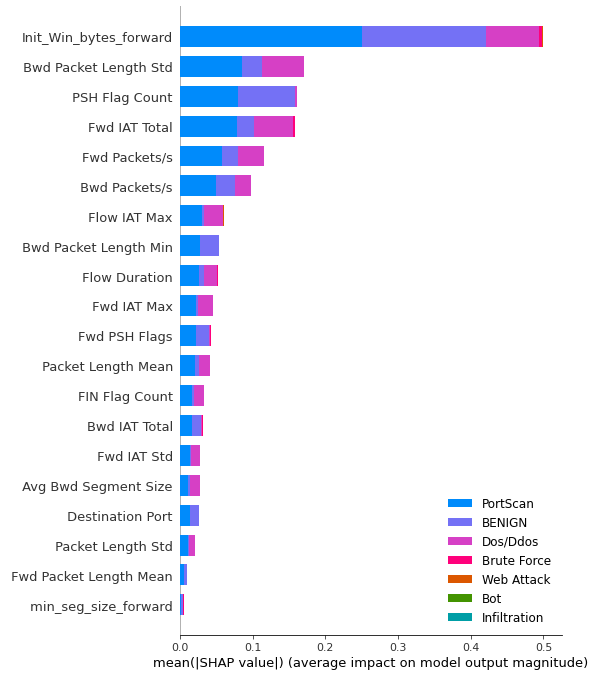

In [60]:

shap.summary_plot(shap_values = shap_values3,
                  features =  df, 
                  class_names = u1,
                   plot_type="bar")


In [61]:

vals= np.abs(shap_values3).mean(1)
feature_importance = pd.DataFrame(list(zip(df.columns, sum(vals))), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
feature_importance.head()
print(feature_importance.to_string())



print('---------------------------------------------------------------------------------')
# feature_importance_vals = 'feature_importance_vals'  # Replace with the name of the column you want to extract
feature_val = feature_importance['feature_importance_vals'].tolist()

# col_name = 'col_name'  # Replace with the name of the column you want to extract
feature_name = feature_importance['col_name'].tolist()


# for item1, item2 in zip(feature_name, feature_val):
#     print(item1, item2)


# Use zip to combine the two lists, sort based on list1, and then unzip them
zipped_lists = list(zip(feature_name, feature_val))
zipped_lists.sort(key=lambda x: x[1],reverse=True)

# Convert the sorted result back into separate lists
sorted_list1, sorted_list2 = [list(x) for x in zip(*zipped_lists)]

for k in sorted_list1:
  with open(output_file_name, "a") as f:print("df.pop('",k,"')", sep='',file = f)
  print("df.pop('",k,"')")

for k in sorted_list1:
  with open(output_file_name, "a") as f:print("'",k,"',", sep='', file = f)
  print("'",k,"',")

# with open(output_file_name, "a") as f:print("]", file = f)
print("]")

print('---------------------------------------------------------------------------------')




# shap.summary_plot(shap_values = shap_values[0],
#                  features = test[start_index:end_index],
#                   class_names=[label[0],label[1],label[2],label[3],label[4],label[5],label[6]],show=False)


# plt.savefig('DNN_Shap_Summary_Beeswarms.png')
# plt.clf()


                   col_name  feature_importance_vals
26   Init_Win_bytes_forward                 0.499955
4     Bwd Packet Length Std                 0.170671
21           PSH Flag Count                 0.160674
8             Fwd IAT Total                 0.158240
15            Fwd Packets/s                 0.115409
16            Bwd Packets/s                 0.097917
7              Flow IAT Max                 0.060082
3     Bwd Packet Length Min                 0.054029
1             Flow Duration                 0.052524
10              Fwd IAT Max                 0.045461
14            Fwd PSH Flags                 0.043189
18       Packet Length Mean                 0.040971
20           FIN Flag Count                 0.032886
11            Bwd IAT Total                 0.031799
9               Fwd IAT Std                 0.027963
25     Avg Bwd Segment Size                 0.027257
0          Destination Port                 0.026775
19        Packet Length Std                 0.

In [62]:



print('---------------------------------------------------------------------------------')
print('Generating Sparsity Graph')
print('---------------------------------------------------------------------------------')
print('')

# Find the minimum and maximum values in the list
min_value = min(feature_val)
max_value = max(feature_val)

# Normalize the list to the range [0, 1]
normalized_list = [(x - min_value) / (max_value - min_value) for x in feature_val]

# print(feature_name,normalized_list,'\n')
# for item1, item2 in zip(feature_name, normalized_list):
#     print(item1, item2)

#calculating Sparsity

# Define the threshold
threshold = 1e-10

# Initialize a count variable to keep track of values below the threshold
count_below_threshold = 0

# Iterate through the list and count values below the threshold
for value in normalized_list:
    if value < threshold:
        count_below_threshold += 1

Sparsity = count_below_threshold/len(normalized_list)
Spar = []
print('Sparsity = ',Sparsity)
X_axis = []
#----------------------------------------------------------------------------
for i in range(0, 11):
    i/10
    threshold = i/10
    for value in normalized_list:
        if value < threshold:
            count_below_threshold += 1

    Sparsity = count_below_threshold/len(normalized_list)
    Spar.append(Sparsity)
    X_axis.append(i/10)
    count_below_threshold = 0


#---------------------------------------------------------------------------

with open(output_file_name, "a") as f:print('y_axis_RF = ', Spar ,'', file = f)
print('y_axis_RF = ', Spar )

with open(output_file_name, "a") as f:print('x_axis_RF = ', X_axis ,'', file = f)
print('x_axis_RF = ', X_axis )

plt.clf()

# Create a plot
plt.plot(X_axis, Spar, marker='o', linestyle='-')

# Set labels for the axes
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

# Set the title of the plot
plt.title('Values vs. X-Axis')

# Show the plot
# plt.show()
plt.savefig('sparsity.png')
plt.clf()

---------------------------------------------------------------------------------
Generating Sparsity Graph
---------------------------------------------------------------------------------

Sparsity =  0.06451612903225806
y_axis_RF =  [0.06451612903225806, 0.7096774193548387, 0.8387096774193549, 0.8709677419354839, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871]
x_axis_RF =  [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


<Figure size 432x288 with 0 Axes>